---

_You are currently looking at **version 0.1** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the Jupyter Notebook FAQ course resource._

---

# Assignment 1 - Introduction to Machine Learning

For this assignment, you will be using the Breast Cancer Wisconsin (Diagnostic) Database to create a classifier that can help diagnose patients. First, read through the description of the dataset (below).

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

print(cancer.DESCR) # Print the data set description

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

The object returned by `load_breast_cancer()` is a scikit-learn Bunch object, which is similar to a dictionary.

In [2]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

### Question 0 (Example)

How many features does the breast cancer dataset have?

*This function should return an integer.*

In [3]:
# You should write your whole answer within the function provided. The autograder will call
# this function and compare the return value against the correct solution value
def answer_zero():
    # This function returns the number of features of the breast cancer dataset, which is an integer. 
    # The assignment question description will tell you the general format the autograder is expecting
    
    # YOUR CODE HERE
    return len(cancer['feature_names'] )
answer_zero() 

# You can examine what your function returns by calling it in the cell. If you have questions
# about the assignment formats, check out the discussion forums for any FAQs

30

### Question 1

Scikit-learn works with lists, numpy arrays, scipy-sparse matrices, and pandas DataFrames, so converting the dataset to a DataFrame is not necessary for training this model. Using a DataFrame does however help make many things easier such as munging data, so let's practice creating a classifier with a pandas DataFrame. 



Convert the sklearn.dataset `cancer` to a DataFrame. 

*This function should return a `(569, 31)` DataFrame with * 

*columns = *

    ['mean radius', 'mean texture', 'mean perimeter', 'mean area',
    'mean smoothness', 'mean compactness', 'mean concavity',
    'mean concave points', 'mean symmetry', 'mean fractal dimension',
    'radius error', 'texture error', 'perimeter error', 'area error',
    'smoothness error', 'compactness error', 'concavity error',
    'concave points error', 'symmetry error', 'fractal dimension error',
    'worst radius', 'worst texture', 'worst perimeter', 'worst area',
    'worst smoothness', 'worst compactness', 'worst concavity',
    'worst concave points', 'worst symmetry', 'worst fractal dimension',
    'target']

*and index = *

    RangeIndex(start=0, stop=569, step=1)

In [4]:
def answer_one():
    # YOUR CODE HERE
    df=pd.DataFrame(cancer.data,columns=cancer.feature_names)
    
    df['target']=cancer.target
    
    return df
df=answer_one()
print(df.head())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

### Question 2
What is the class distribution? (i.e. how many instances of `malignant` and how many `benign`?)

*This function should return a Series named `target` of length 2 with integer values and index =* `['malignant', 'benign']`

In [5]:
def answer_two():
    
    # YOUR CODE HERE
    malignant=df[df['target']==0].shape[0]
    benign=df[df['target']==1].shape[0]
    target=pd.Series([malignant,benign],index=['malignant','benign'])
    return target
    raise NotImplementedError()

In [6]:
answer_two()

malignant    212
benign       357
dtype: int64

### Question 3
Split the DataFrame into `X` (the data) and `y` (the labels).

*This function should return a tuple of length 2:* `(X, y)`*, where* 
* `X` *has shape* `(569, 30)`
* `y` *has shape* `(569,)`.

In [7]:
def answer_three():
    # YOUR CODE HERE
    X=df.drop('target',axis=1)
    y=df['target']
    return X,y
    raise NotImplementedError()
    



In [8]:
answer_three()

(     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
 0          17.99         10.38          122.80     1001.0          0.11840   
 1          20.57         17.77          132.90     1326.0          0.08474   
 2          19.69         21.25          130.00     1203.0          0.10960   
 3          11.42         20.38           77.58      386.1          0.14250   
 4          20.29         14.34          135.10     1297.0          0.10030   
 ..           ...           ...             ...        ...              ...   
 564        21.56         22.39          142.00     1479.0          0.11100   
 565        20.13         28.25          131.20     1261.0          0.09780   
 566        16.60         28.08          108.30      858.1          0.08455   
 567        20.60         29.33          140.10     1265.0          0.11780   
 568         7.76         24.54           47.92      181.0          0.05263   
 
      mean compactness  mean concavity  mean conca

In [9]:
X,y=answer_three()


### Question 4
Using `train_test_split`, split `X` and `y` into training and test sets `(X_train, X_test, y_train, and y_test)`.

**Set the random number generator state to 0 using `random_state=0` to make sure your results match the autograder!**

*This function should return a tuple of length 4:* `(X_train, X_test, y_train, y_test)`*, where* 
* `X_train` *has shape* `(426, 30)`
* `X_test` *has shape* `(143, 30)`
* `y_train` *has shape* `(426,)`
* `y_test` *has shape* `(143,)`

In [10]:
from sklearn.model_selection import train_test_split

def answer_four():
    X_train,X_test,y_train,y_test=train_test_split(X,y,shuffle=True,random_state=0)
    return X_train,X_test,y_train,y_test
    raise NotImplementedError()


In [11]:
X_train,X_test,y_train,y_test=answer_four()


### Question 5
Using KNeighborsClassifier, fit a k-nearest neighbors (knn) classifier with `X_train`, `y_train` and using one nearest neighbor (`n_neighbors = 1`).

*This function should return a `sklearn.neighbors.classification.KNeighborsClassifier`.

In [12]:
from sklearn.neighbors import KNeighborsClassifier

def answer_five():
    # YOUR CODE HERE
    knn=KNeighborsClassifier(n_neighbors=1)
    knn.fit(X_train,y_train)
    return knn
    raise NotImplementedError()

In [13]:
knn=answer_five()


### Question 6
Using your knn classifier, predict the class label using the mean value for each feature.

Hint: You can use `cancerdf.mean()[:-1].values.reshape(1, -1)` which gets the mean value for each feature, ignores the target column, and reshapes the data from 1 dimension to 2 (necessary for the precict method of KNeighborsClassifier).

In [14]:
def answer_six():
    # YOUR CODE HERE
    feature_mean=X.mean().values.reshape(1,-1)
    knnpredict=knn.predict(feature_mean)
    return  knnpredict
    raise NotImplementedError()

In [15]:
output=answer_six()
output

array([1])

### Question 7
Using your knn classifier, predict the class labels for the test set `X_test`.

*This function should return a numpy array with shape `(143,)` and values either `0.0` or `1.0`.*

In [16]:
def answer_seven():
    # YOUR CODE HERE
    knnpredict=knn.predict(X_test)
    return knnpredict
    raise NotImplementedError()

In [17]:
knnpredict=answer_seven()
knnpredict.shape

(143,)

### Question 8
Find the score (mean accuracy) of your knn classifier using `X_test` and `y_test`.

*This function should return a float between 0 and 1*

In [18]:
def answer_eight():
    # YOUR CODE HERE
    mean_accuracy=knn.score(X_test,y_test)
    return mean_accuracy
    raise NotImplementedError()

In [19]:
mena_accuracy=answer_eight()
mena_accuracy

0.916083916083916

### Optional plot

Try using the plotting function below to visualize the different predicition scores between train and test sets, as well as malignant and benign cells.

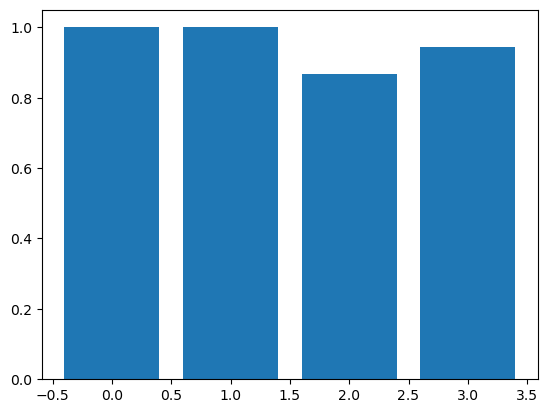

In [20]:
get_ipython().run_line_magic('matplotlib', 'inline')
def accuracy_plot():
    import matplotlib.pyplot as plt

    %matplotlib inline
    
    # YOUR CODE HERE
    mag_X_train=X_train[y_train==0]
    mag_X_test=X_test[y_test==0]
    mag_y_train=y_train[y_train==0]
    mag_y_test=y_test[y_test==0]
    
    ben_X_train=X_train[y_train==1]
    ben_X_test=X_test[y_test==1]
    ben_y_train=y_train[y_train==1]
    ben_y_test=y_test[y_test==1]
    
    score=[knn.score(mag_X_train,mag_y_train),knn.score(ben_X_train,ben_y_train),knn.score(mag_X_test,mag_y_test),knn.score(ben_X_test,ben_y_test)]
    
    
    
    
    
    bars=plt.bar(np.arange(4),score)
    plt.show()
    
accuracy_plot()

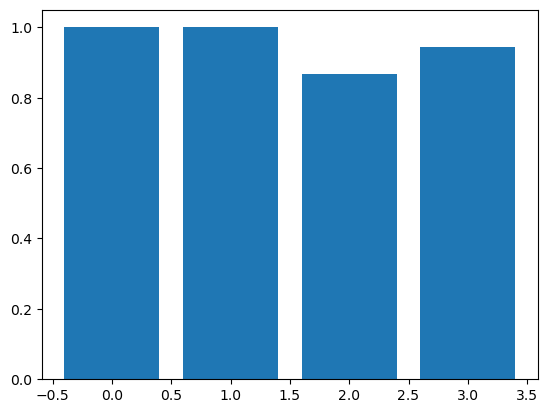

In [21]:
## Uncomment the plotting function to see the visualization, 
# Comment out the plotting function when submitting your notebook for grading

%matplotlib ipympl
accuracy_plot() 